In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn

In [2]:
data=pd.read_csv('balanced_sentiment_dataset.csv')

In [4]:
data.head()

,Reviews,Result
0,I love this product!,Positive
1,This is amazing!,Positive
2,Absolutely fantastic experience.,Positive
3,I am very happy today.,Positive
4,The service was excellent.,Positive


In [6]:
data['Result'].value_counts()

Result
Positive    50
Negative    50
Neutral     50
Name: count, dtype: int64

In [3]:
x=data['Reviews']
y=data['Result']

In [8]:
x

0                  I love this product!
1                      This is amazing!
2      Absolutely fantastic experience.
3                I am very happy today.
4            The service was excellent.
                     ...               
145              He is washing clothes.
146                It is a working day.
147                The dog is sleeping.
148            I am listening to music.
149       There are people in the park.
Name: Reviews, Length: 150, dtype: object

In [9]:
y

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
145     Neutral
146     Neutral
147     Neutral
148     Neutral
149     Neutral
Name: Result, Length: 150, dtype: object

In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

x_update=[]
stop_words=set(stopwords.words("english"))
for words in x:
    lower=words.lower()
    clean_text = lower.translate(str.maketrans('', '', string.punctuation))
    tokens=word_tokenize(clean_text)
    filtered_words=[]
    for i in tokens:
        if i not in stop_words:
            filtered_words.append(i)
    x_update.append(" ".join(filtered_words))

In [5]:
print(x_update)

['love product', 'amazing', 'absolutely fantastic experience', 'happy today', 'service excellent', 'great job keep', 'app wonderful', 'food tastes great', 'enjoyed time', 'everything perfect', 'thrilled', 'best purchase ever', 'highly recommended everyone', 'feel awesome today', 'support team helpful', 'quality topnotch', 'absolutely delighted results', 'made day', 'satisfied', 'pleasant surprise', 'like lot', 'brilliant', 'well done', 'yes passed exam', 'fantastic works perfectly', 'beautiful experience', 'movie fantastic', 'amazing day', 'feeling great', 'wonderful service', 'package arrived safely', 'design stunning', 'impressive work', 'results outstanding', 'perfectly executed task', 'really enjoyed', 'delightful', 'lovely moment', 'app fantastic', 'loved every bit', 'worth', 'smiling day', 'awesome', 'excellent product', 'best ever', 'good experience', 'excited', 'amazing', 'everything worked well', 'top quality service', 'worst product', 'hate', 'terrible experience', 'sad today

In [14]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_update,y,test_size=0.3,random_state=42)

In [33]:
len(x_train)

105

In [32]:
len(x_test)

45

In [19]:
len(y_train)

105

In [20]:
len(y_test)

45

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
tfidf=TfidfVectorizer()

In [70]:
X_train=tfidf.fit_transform(x_train)

In [71]:
X_test=tfidf.transform(x_test)

In [77]:
model = LinearSVC()

In [78]:
model.fit(X_train,y_train)

LinearSVC()

In [79]:
y_pred=model.predict(X_test)

In [42]:
y_pred[0:10]

array(['Negative', 'Neutral', 'Neutral', 'Negative', 'Negative',
       'Negative', 'Negative', 'Neutral', 'Neutral', 'Neutral'],
      dtype=object)

In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6444444444444445

Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.62      0.62        13
     Neutral       0.52      0.92      0.67        13
    Positive       1.00      0.47      0.64        19

    accuracy                           0.64        45
   macro avg       0.71      0.67      0.64        45
weighted avg       0.75      0.64      0.64        45


Confusion Matrix:
 [[ 8  5  0]
 [ 1 12  0]
 [ 4  6  9]]


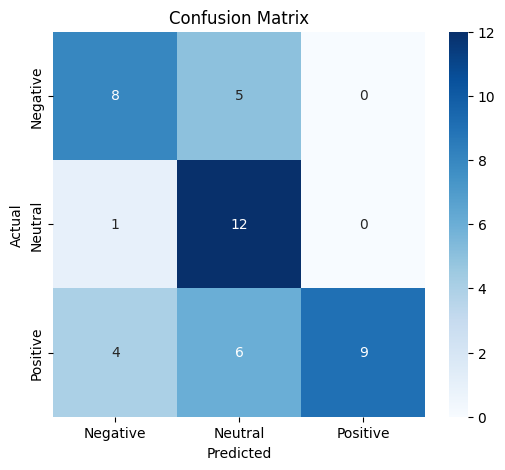

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [82]:
import joblib

In [84]:
joblib.dump(model,"Sentiment_analysis_model.pkl")

['Sentiment_analysis_model.pkl']

In [86]:
joblib.dump(tfidf,"tfidfvector.pkl")

['tfidfvector.pkl']